This notebook analyzes the differences between applying ORA with or without a threshold.

In [1]:
import getpass
import sys
import time

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi'] = 200

In [4]:
print(getpass.getuser())

ddomingofernandez


In [5]:
print(sys.version)

3.6.5 (default, Apr 20 2018, 08:54:42) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-16)]


In [6]:
print(time.asctime())

Thu May 16 12:36:56 2019


Load results

In [7]:
ora_no_threshold = pd.read_csv('../../../input/ora_no_threshold_results.csv', index_col=0)
ora_threshold = pd.read_csv('../../../input/ora_with_threshold_results.csv', index_col=0)

In [8]:
ora_no_threshold.head()

,dataset,database,enriched_pathways
0,BRCA,KEGG,211
1,BRCA,Merged,972
2,BRCA,Reactome,670
3,BRCA,WikiPathways,131
4,KIRC,KEGG,18


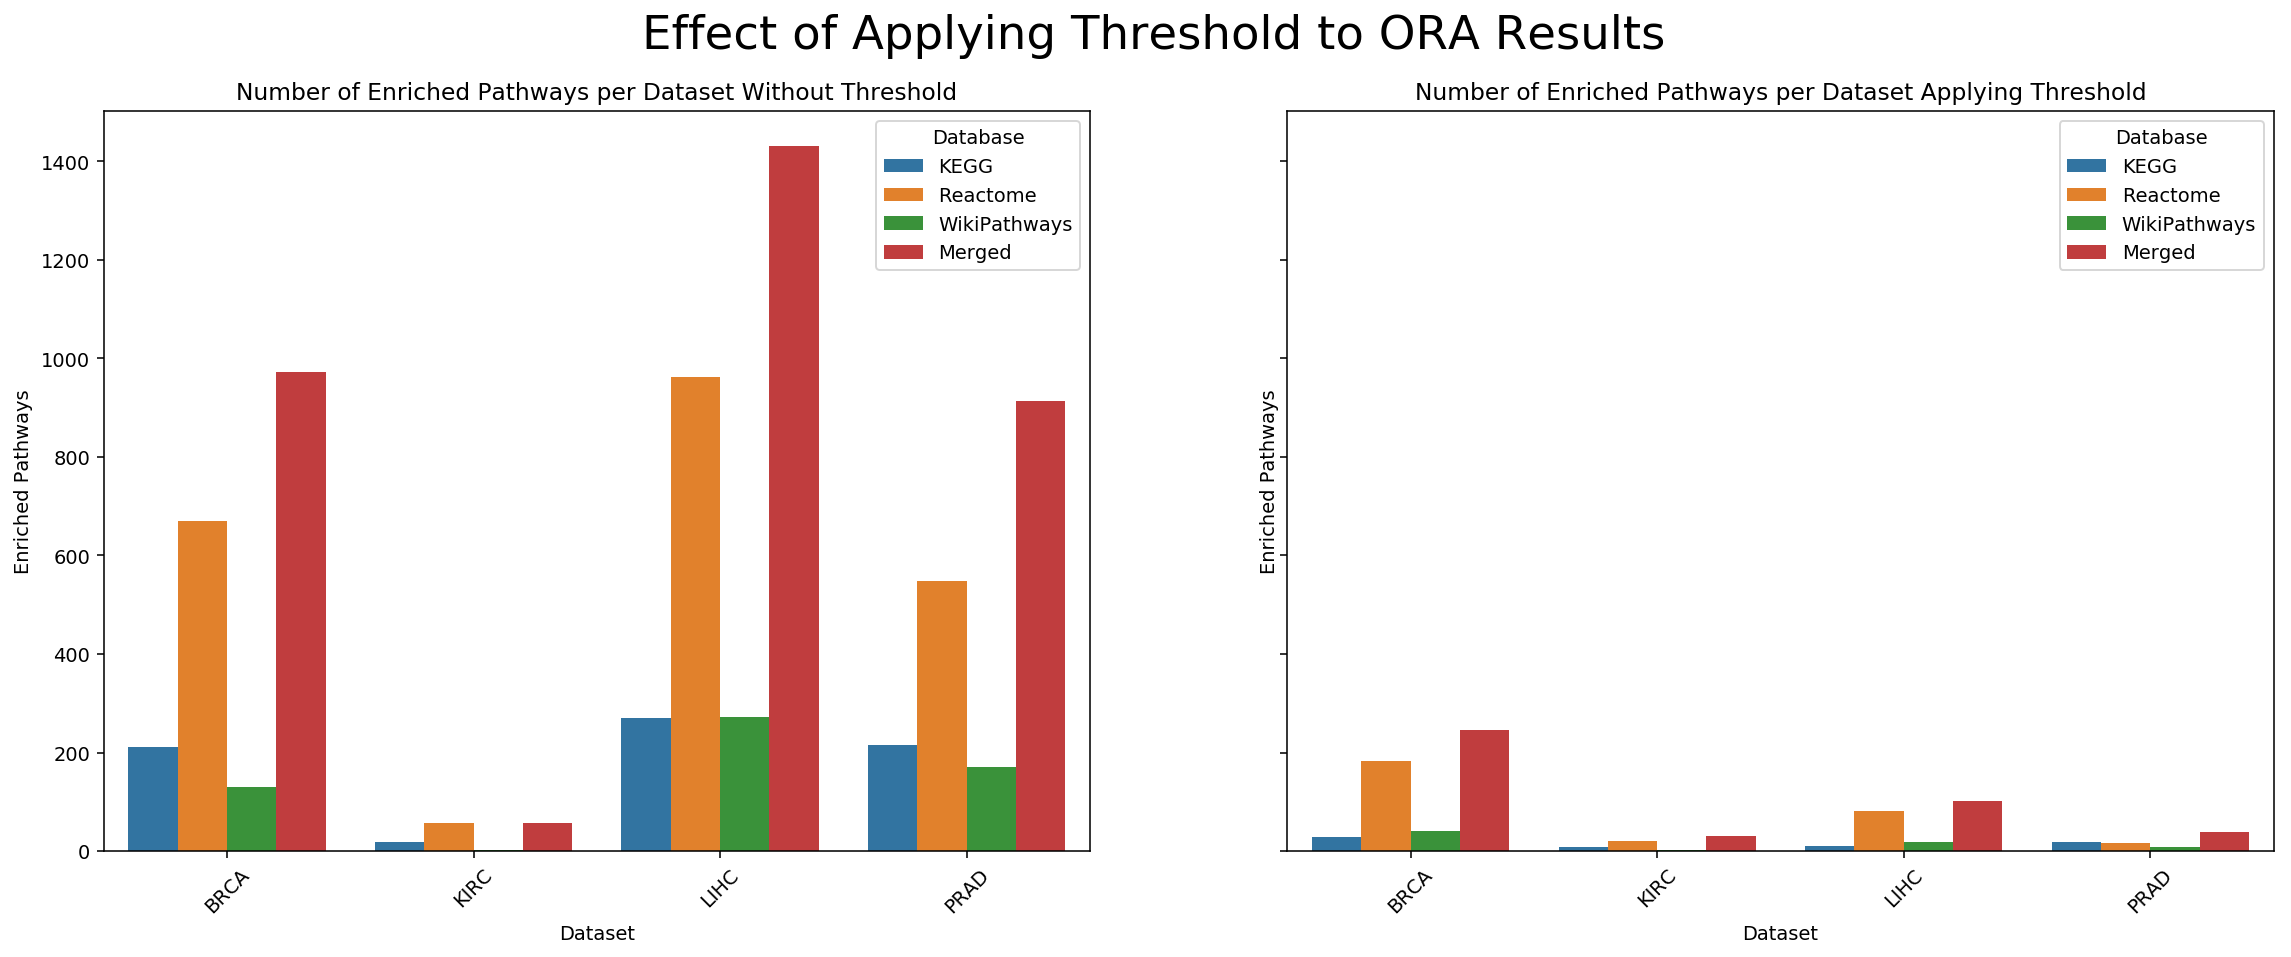

In [14]:
fig, (lax, rax) = plt.subplots(1, 2, figsize=(20, 7), dpi=140, sharey=True)

fig.suptitle('Effect of Applying Threshold to ORA Results', fontsize=24)

ora_no_threshold.columns = ['Dataset', 'Database', 'Enriched Pathways']

lax = sns.barplot(
    y='Enriched Pathways',
    x='Dataset',
    hue='Database',
    data=ora_no_threshold,
    hue_order=['KEGG', 'Reactome', 'WikiPathways', 'Merged'],
    ax=lax,
)
lax.set_xticklabels(lax.get_xticklabels(), rotation=45)
lax.set_title('Number of Enriched Pathways per Dataset Without Threshold')

ora_threshold.columns = ['Dataset', 'Database', 'Enriched Pathways']

rax = sns.barplot(
    y='Enriched Pathways',
    x='Dataset',
    hue='Database',
    data=ora_threshold,
    hue_order=['KEGG', 'Reactome', 'WikiPathways', 'Merged'],
    ax=rax,
)
rax.set_xticklabels(rax.get_xticklabels(), rotation=45)
rax.set_title('Number of Enriched Pathways per Dataset Applying Threshold')

plt.show()

**Figure 1**. Influence of applying a threshold to the genes used to conduct the ORA enrichment. The number of enriched pathways is influenced by the threshold applied.